# Reading in height model¶

Descritption see here: [https://github.com/AndaSampa/building-height-model] and here [https://www.kaggle.com/datasets/andasampa/height-model]

Resolution is 0.5m horizontally and data unit seems height above DEM (Digital Earth Model) in 32 bit resolution. ???Looks like vertcal units are also m???

Coordinate reference is UTM

Soa Paulo UTM zone: 23K, UTM Northing 7394586.0921784, UTM Easting 333286.919438099 (https://www.countrycoordinate.com/city-sao-paulo-brazil/)

y=Dist from equ in m, x= distance from Eastrtn boarder of UTM zone


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rxr
import glob

#### Read in whole city
mosfunctions (np, plotting) do not work due to memory error

In [2]:
#read data with rioxarray, 
#.squeeze() --> to reduce size to only read band with information
hm_BH_arr = rxr.open_rasterio('/home/dana/data/UNICEF_data/height-model/0-BHM-sao-paulo-city-all.tif',masked=True).squeeze()
hm_BH_arr.shape, hm_BH_arr.head()

((139836, 94209),
 <xarray.DataArray (y: 5, x: 5)>
 array([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]], dtype=float32)
 Coordinates:
     band         int64 1
   * x            (x) float64 3.135e+05 3.135e+05 3.135e+05 3.135e+05 3.135e+05
   * y            (y) float64 7.416e+06 7.416e+06 7.416e+06 7.416e+06 7.416e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:  Area
     scale_factor:   1.0
     add_offset:     0.0)

### Read in subset of city

In [8]:
#BH= building height
#masked=True : not display nan
hm_BH2222_232_arr = rxr.open_rasterio('/home/dana/data/UNICEF_data/height-model/2222-BHM/BHM-2222-232.tif',masked=True).squeeze()
np.nanmin(hm_BH2222_232_arr),np.nanmax(hm_BH2222_232_arr),hm_BH2222_232_arr.shape

(-1.342063, 12.805551, (1147, 928))

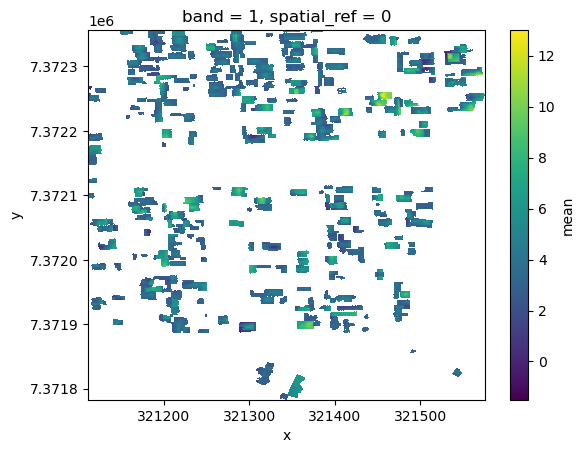

In [9]:
hm_BH2222_232_arr.plot(vmin=-1.5,vmax=13);

In [16]:
# VH= vegetation height
hm_VH2222_232_arr = rxr.open_rasterio('/home/dana/data/UNICEF_data/height-model/2222-VHM/VHM-2222-232.tif',masked=True).squeeze()
np.nanmin(hm_VH2222_232_arr),np.nanmax(hm_VH2222_232_arr),hm_VH2222_232_arr.shape

(-0.2358081, 41.813118, (1175, 1085))

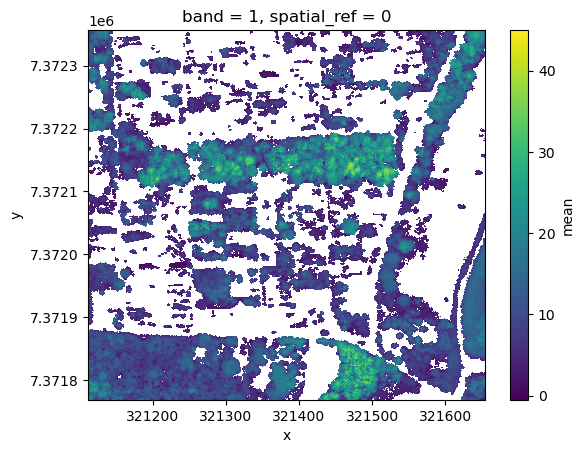

In [17]:
hm_VH2222_232_arr.plot(vmin=-0.5,vmax=45);

#### go through all BHM files
check for negative values

In [19]:
#code Tim
"""
List all the BHM (non-merged) files from the AWS data folder.
"""
# path to data
datapath = "/home/dana/data/UNICEF_data/height-model/"

# search through BHM folders and add them to list
folder_search = glob.glob(datapath + "????-BHM")
folder_list = []
for folder in folder_search:
    folder_list.append(folder)
file_list=[] 
for folder in folder_list:
    file_search = glob.glob(folder + "/BHM-????-???.tif")
    file_list.extend(file_search) 

In [21]:
neg_value_list=[]
min_neg_value_list=[]
number_total_entries=0.0

for file in file_list:
    file_array=rxr.open_rasterio(file)
    neg_value_list.append(np.size(np.where(file_array<0)))
    number_total_entries+=np.size(file_array)
    min_neg_value_list.append(np.nanmin(file_array))

#### check distribution of negative values

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.500e+01, 4.456e+03]),
 array([-247.04344177, -220.77703857, -194.51062012, -168.24421692,
        -141.97781372, -115.71140289,  -89.44499207,  -63.17858505,
         -36.91217804,  -10.64576817,   15.6206398 ]),
 <BarContainer object of 10 artists>)

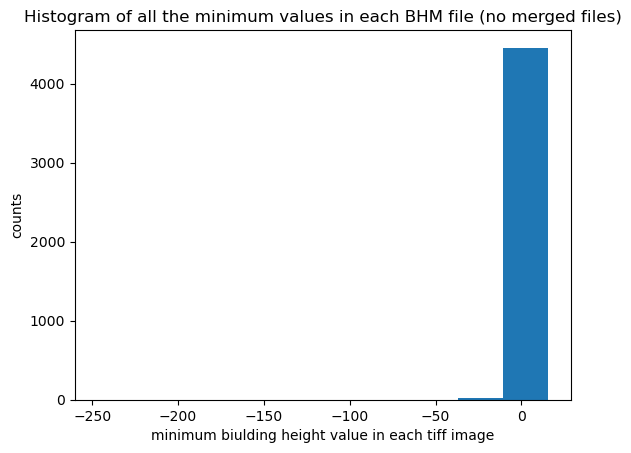

In [25]:
plt.title('Histogram of all the minimum values in each BHM file (no merged files)')
plt.ylabel('counts')
plt.xlabel('minimum biulding height value in each tiff image')
plt.hist(min_neg_value_list)

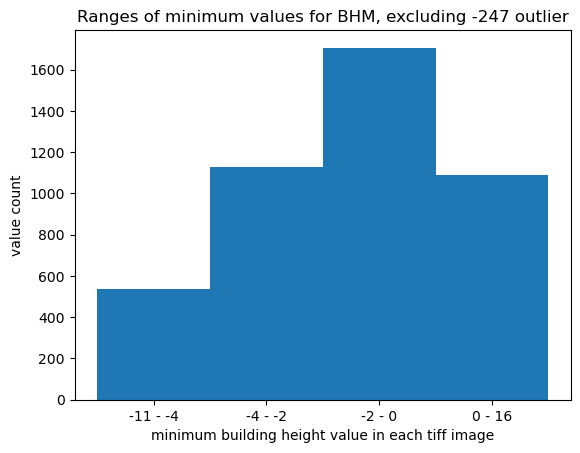

In [28]:
bins = [-11,-4,-2,0,16] # your bins
data = min_neg_value_list

hist, bin_edges = np.histogram(data,bins) # make the histogram

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

ax.set_title('Ranges of minimum values for BHM, excluding -247 outlier')
ax.set_ylabel('value count')
ax.set_xlabel('minimum building height value in each tiff image')

plt.show()

check max values

In [29]:
#value_list=[]
max_value_list=[]
for file in file_list:
    file_array=rxr.open_rasterio(file)
    max_value_list.append(np.nanmax(file_array))

(array([2.666e+03, 9.180e+02, 5.320e+02, 3.160e+02, 4.200e+01, 8.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,  29.23770523,  58.47541046,  87.71311188,
        116.95082092, 146.18852234, 175.42622375, 204.66392517,
        233.90164185, 263.13934326, 292.37704468]),
 <BarContainer object of 10 artists>)

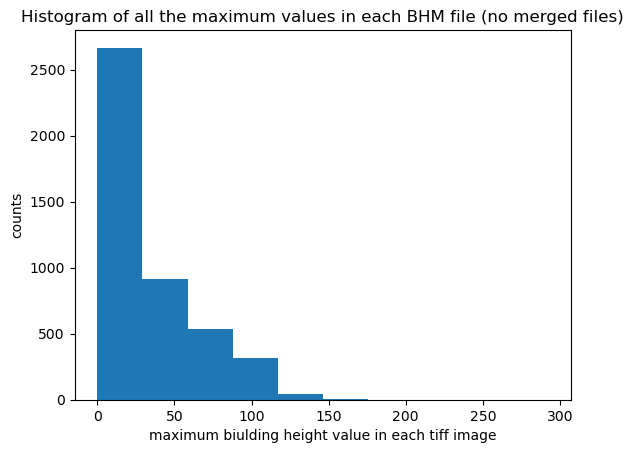

In [32]:
plt.title('Histogram of all the maximum values in each BHM file (no merged files)')
plt.ylabel('counts')
plt.xlabel('maximum biulding height value in each tiff image')
plt.hist(max_value_list)

In [ ]:
#find outlier
